In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [41]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [42]:
df = df[['Age', 'Income','Initial_days', 'BackPain','Asthma']]

In [43]:
df['Income'] = df['Income'].round(0).astype(int)
df['Initial_days'] = df['Initial_days'].round(0).astype(int)
df = df.replace(to_replace = ['No', 'Yes'], value = [0, 1])

In [44]:
df.isna().any()

Age             False
Income          False
Initial_days    False
BackPain        False
Asthma          False
dtype: bool

In [45]:
df.describe()

,Age,Income,Initial_days,BackPain,Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,53.511700,40490.498900,34.455300,0.411400,0.28930
std,20.638538,28521.156376,26.311671,0.492112,0.45346
min,18.000000,154.000000,1.000000,0.000000,0.00000
25%,36.000000,19598.500000,8.000000,0.000000,0.00000
50%,53.000000,33768.500000,36.000000,0.000000,0.00000
75%,71.000000,54296.500000,61.000000,1.000000,1.00000
max,89.000000,207249.000000,72.000000,1.000000,1.00000


In [46]:
df.head()

,Age,Income,Initial_days,BackPain,Asthma
0,53,86576,11,1,1
1,51,46806,15,0,0
2,53,14370,5,0,0
3,78,39741,2,0,1
4,22,1210,1,0,0


In [47]:
# Use the whiten() function to standardize the data
whiten_numeric = pd.DataFrame( data = whiten(obs = df, check_finite = True), columns = df.columns)
whiten_numeric

,Age,Income,Initial_days,BackPain,Asthma
0,2.568140,3.035653,0.418086,2.032159,2.205376
1,2.471229,1.641180,0.570118,0.000000,0.000000
2,2.568140,0.503862,0.190039,0.000000,0.000000
3,3.779526,1.393456,0.076016,0.000000,2.205376
4,1.066020,0.042427,0.038008,0.000000,0.000000
...,...,...,...,...,...
9995,1.211387,1.611796,1.976408,0.000000,0.000000
9996,4.215626,0.525356,2.622542,0.000000,2.205376
9997,2.180496,2.311312,2.660549,0.000000,0.000000
9998,2.083585,1.041454,2.394494,2.032159,0.000000


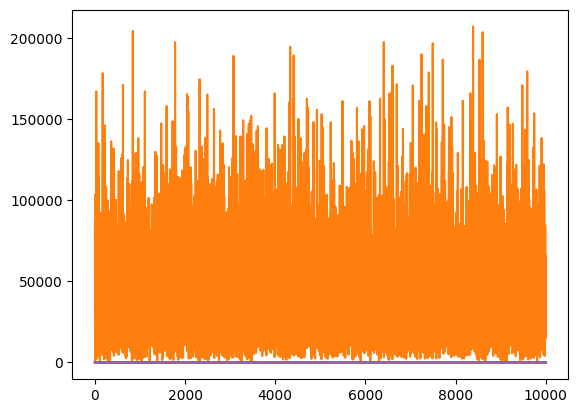

In [48]:
#Plot original data
plt.plot(df, label='original')
plt.show()


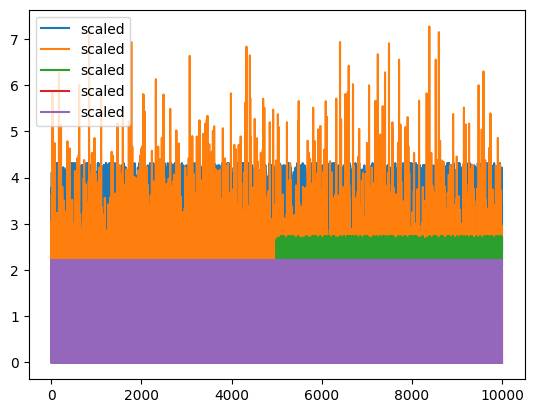

In [49]:
# Plot scaled data
plt.plot(whiten_numeric, label = 'scaled')
plt.legend()
plt.show()

In [50]:
#Sanity check to make sure the standard deviation is the same, aka the data is normalized
for i in whiten_numeric.columns:
    print([i, whiten_numeric[i].std()])

['Age', 1.0000500037503124]
['Income', 1.0000500037503126]
['Initial_days', 1.0000500037503124]
['BackPain', 1.0000500037503124]
['Asthma', 1.0000500037503126]


In [51]:
whiten_numeric.describe()

,Age,Income,Initial_days,BackPain,Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.592934,1.419736,1.309572,0.836030,0.638015
std,1.000050,1.000050,1.000050,1.000050,1.000050
min,0.872198,0.005400,0.038008,0.000000,0.000000
25%,1.744397,0.687191,0.304063,0.000000,0.000000
50%,2.568140,1.184040,1.368283,0.000000,0.000000
75%,3.440338,1.903822,2.318479,2.032159,2.205376
max,4.312537,7.266864,2.736565,2.032159,2.205376


In [52]:
# Compute cluster centers
kmeans_whiten = kmeans(obs = whiten_numeric, k_or_guess = 3, iter = 20, thresh = 1e-05, check_finite = True)
kmeans_whiten

(array([[2.62356529, 1.42079176, 1.34151145, 2.0321592 , 0.        ],
        [2.56198941, 1.41266048, 1.30194239, 0.        , 0.        ],
        [2.6073999 , 1.42899074, 1.28875904, 0.8583818 , 2.20537591]]),
 1.731941833689624)

In [53]:
# Generate cluster centers and labels
centroid_numeric, label_numeric = kmeans_whiten
code_numeric, dist_numeric = vq( obs = whiten_numeric, code_book = centroid_numeric, check_finite = True)

In [54]:
#Elbow method: Declaring variables for use
distortions = []
num_cluster = range(2, 7)

In [57]:
#Populating distortions for various clusters
for i in num_cluster:
    centoids, distortion = kmeans(whiten_numeric, i)
    distortions.append(distortion)

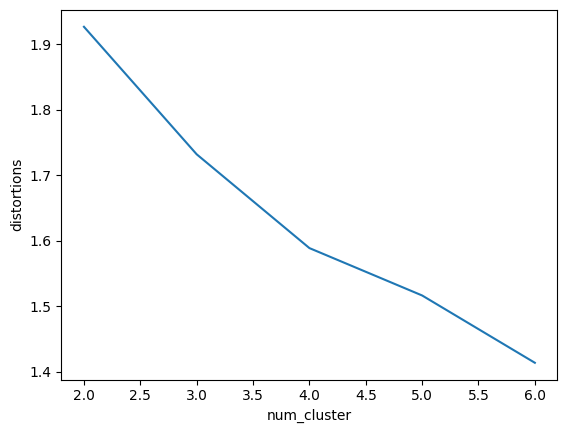

In [58]:
#Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_cluster': num_cluster, 'distortions': distortions})
sns.lineplot(x = 'num_cluster', y = 'distortions', data = elbow_plot_data)
plt.show()